In [339]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.models import load_model
import pandas as pd
from pathlib import Path
import os
import scipy
from scipy import stats
from sklearn import preprocessing
import numpy as np
os.getcwd()

'/Users/rsfletch/github/bts/notebooks'

In [340]:
cols = ['Win', 'HPG', 'HPAB_p', 'spot', 'home', 'factor', 'BAT_HAND', 'PIT_HAND']
num_cols = len(cols)
num_feat = num_cols - 1
base = main_data.loc[main_data.year == 2018, cols]*1
basenp = base.to_numpy()
X = basenp[:,1:num_cols]
y = basenp[:,0]

In [341]:
model = Sequential()
model.add(Dense(12, input_dim=num_feat, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [342]:
model.fit(X, y, epochs=15, batch_size=128)

Epoch 1/15
33628/33628 [==============================] - 1s 41us/step - loss: 0.6634 - accuracy: 0.6195
Epoch 2/15
33628/33628 [==============================] - 1s 22us/step - loss: 0.6542 - accuracy: 0.6320
Epoch 3/15
33628/33628 [==============================] - 1s 21us/step - loss: 0.6528 - accuracy: 0.6338
Epoch 4/15
33628/33628 [==============================] - 1s 21us/step - loss: 0.6523 - accuracy: 0.6332
Epoch 5/15
33628/33628 [==============================] - 1s 22us/step - loss: 0.6521 - accuracy: 0.6344
Epoch 6/15
33628/33628 [==============================] - 1s 26us/step - loss: 0.6519 - accuracy: 0.6343
Epoch 7/15
33628/33628 [==============================] - 1s 24us/step - loss: 0.6515 - accuracy: 0.6349
Epoch 8/15
33628/33628 [==============================] - 1s 22us/step - loss: 0.6512 - accuracy: 0.6344
Epoch 9/15
33628/33628 [==============================] - 1s 22us/step - loss: 0.6512 - accuracy: 0.6338
Epoch 10/15
33628/33628 [==============================

array([[<AxesSubplot:title={'center':'EstProb'}>]], dtype=object)

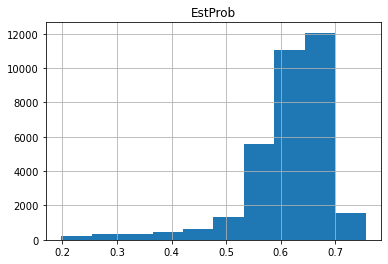

In [343]:
predictions = model.predict(X)
pd.DataFrame(predictions, columns=['EstProb']).hist()

In [344]:
base['EstProb'] = model.predict(X)
base['bin'] = pd.qcut(base['EstProb'], 10, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

<AxesSubplot:xlabel='bin', ylabel='EstProb'>

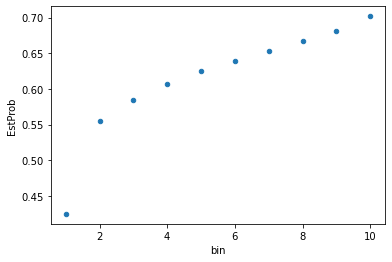

In [345]:
dots = base.groupby(['bin'])['EstProb'].agg('mean')
dots = dots.reset_index()
dots.plot.scatter('bin', 'EstProb')

In [326]:
# 'HPG', 'HPAB_p', 'spot', 'home', 'factor', 'BAT_HAND', 'PIT_HAND', 'avg_win', 'year'
cols = ['HPG', 'HPAB_p', 'spot', 'home', 'factor', 'BAT_HAND', 'PIT_HAND']
num_cols = len(cols)
num_feat = num_cols - 1

def prep_data(df):
    df[['home']] = df[['home']]*1
    X = df[cols]*1
    Y = df[['Win']]*1
    X_train = X[(df.year <= 2014)].to_numpy() # (df.year >= 2000) & 
    Y_train = Y[(df.year <= 2014)].to_numpy() # (df.year >= 2000) & 
    X_test = X[df.year >=  2015].to_numpy()
    Y_test = Y[df.year >=  2015].to_numpy()

    mean = np.mean(X_train, axis=0)
    X_train -= mean
    X_test -= mean
    std = np.std(X_train, axis=0)
    print(std)
    X_train /= std
    X_test /= std
    
    return X_train, Y_train, X_test, Y_test

In [327]:
processed = '../data/processed'
main_data = pd.read_pickle(Path(processed) / 'main_data.pkl')

main_data = main_data.dropna()

X_train, Y_train, X_test, Y_test = prep_data(main_data)

[0.23995129 0.03665046 2.48583741 0.49919897 0.0553461  0.49683093
 0.4528697 ]


In [328]:
counts = np.bincount(Y_train[:, 0])
print(
    "Number of positive samples in training data: {} ({:.2f}% of total)".format(
        counts[1], 100 * float(counts[1]) / len(Y_train)
    )
)

weight_for_0 = 1.0 / counts[0]
weight_for_1 = 1.0 / counts[1]

Number of positive samples in training data: 81959 (63.73% of total)


In [329]:
model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [330]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [331]:
model.fit(X_train, Y_train, epochs=10, batch_size=64)
print('done')

Epoch 1/10
128609/128609 [==============================] - 4s 30us/step - loss: 0.6457 - accuracy: 0.6439
Epoch 2/10
128609/128609 [==============================] - 3s 26us/step - loss: 0.6418 - accuracy: 0.6486
Epoch 3/10
128609/128609 [==============================] - 3s 27us/step - loss: 0.6413 - accuracy: 0.6491
Epoch 4/10
128609/128609 [==============================] - 3s 26us/step - loss: 0.6410 - accuracy: 0.6496
Epoch 5/10
128609/128609 [==============================] - 3s 25us/step - loss: 0.6408 - accuracy: 0.6494
Epoch 6/10
128609/128609 [==============================] - 3s 25us/step - loss: 0.6408 - accuracy: 0.6497
Epoch 7/10
128609/128609 [==============================] - 3s 25us/step - loss: 0.6406 - accuracy: 0.6500
Epoch 8/10
128609/128609 [==============================] - 3s 25us/step - loss: 0.6405 - accuracy: 0.6502
Epoch 9/10
128609/128609 [==============================] - 3s 25us/step - loss: 0.6403 - accuracy: 0.6502
Epoch 10/10
128609/128609 [==========

In [332]:
model.summary()
_, accuracy = model.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (accuracy*100))

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_148 (Dense)            (None, 12)                96        
_________________________________________________________________
dense_149 (Dense)            (None, 8)                 104       
_________________________________________________________________
dense_150 (Dense)            (None, 1)                 9         
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________
157842/157842 [==============================] - 3s 17us/step
Accuracy: 64.27


In [333]:
predictions = model.predict(X_test)

In [335]:
test_data = main_data[main_data.year >=  2015]
test_data['EstProb'] = predictions

/Users/rsfletch/opt/anaconda3/envs/bts/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [336]:
test_data = test_data.set_index(['GAME_ID', 'BAT_ID'])

In [337]:
selection = test_data.groupby('Date')['EstProb'].nlargest(2).to_frame()

selection = selection.sort_values(
    by=['Date', 'EstProb', 'GAME_ID'], ascending=[True, False, True])

selection['pick_order'] = selection.groupby(['Date']).cumcount()+1
selection.to_pickle('../data/processed/selection_data.pkl')

In [338]:
interim = '../data/interim'
processed = '../data/processed'

hits = pd.read_pickle(Path(interim) / 'hits.pkl')

# selection_data = selections.merge(hits, on =['GAME_ID', 'BAT_ID'])
selection_data = selection.merge(main_data, on =['GAME_ID', 'BAT_ID'])
selection_data = selection_data.set_index(['Date', 'pick_order'])

selection_data.to_pickle(Path(processed) / 'selection_data.pkl')